# The figures from the letter
Here we plot the figures in the order they appear in the letter. Some formatting may be different.

It is only plotting code. In order to generate look up tables one has to run:
...


In [3]:
# importing all necessary things
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from radiator.crosssections import *

# defining figure style
from radiator.figurestyle import *
define_figure_style()

## Figure 1 (atomic vs IC)

In [4]:
# loading photon propagation look up tables:
E_ph_interaction_list = np.load('E_effective.npz')['E_ph_interaction_list']
Interaction_fraction = np.load('E_effective.npz')['Interaction_fraction']
Interaction_fraction_H = np.load('E_effective.npz')['Interaction_fraction_H']
Interaction_fraction_He = np.load('E_effective.npz')['Interaction_fraction_He']

# system parameters
z = 30.0 # redshift
delta = 0.0 # overdensity
xi = 0.01 # ionization fraction

# setting up relativistic environment
cs = cross_sections(cs={'photion': 'VFKY1996', 'collion': 'RBEQ', 'collex': 'RBEQ'})

data = np.load('output/%05i-%01.5f-%08.1f-snap'%(z,xi,delta) + \
               '_'+cs.cs['collion']+'_'+cs.cs['collex']+ \
               '_'+cs.cs['photion'] +'.npz')

E0_list = data['E0_list']
Eg_list = data['Eg_list']
EgeV_list = data['EgeV_list']

def calculate_channels_fractions(data):
    photons_particles_all = data['photons_particles_all']
    results = data['results']
    channels = np.zeros(len(E0_list), dtype=([('IC_soft', 'f4'), ('atomic', 'f4'), ('IC_H', 'f4'), ('IC_He', 'f4'), ('IC_tot', 'f4')]))
    for i_E in range(len(E0_list)):
    #     print i_E
        channels['IC_soft'][i_E] = 0
        channels['IC_soft'][i_E] = np.sum((photons_particles_all[:, i_E]*Eg_list)[EgeV_list<13.6]) / np.sum((photons_particles_all[:, i_E]*Eg_list))*results['IC'][i_E]
        channels['IC_tot'][i_E] = 0
        for i in range(len(E_ph_interaction_list)-1):
            channels['IC_tot'][i_E] += Interaction_fraction[i] * np.sum((photons_particles_all[:, i_E]*Eg_list)[(EgeV_list>=E_ph_interaction_list[i]) & (EgeV_list<E_ph_interaction_list[i+1])])
        channels['IC_tot'][i_E] /= np.sum((photons_particles_all[:, i_E]*Eg_list))
        channels['IC_H'][i_E] = 0
        for i in range(len(E_ph_interaction_list)-1):
            channels['IC_H'][i_E] += Interaction_fraction_H[i] * np.sum((photons_particles_all[:, i_E]*Eg_list)[(EgeV_list>=E_ph_interaction_list[i]) & (EgeV_list<E_ph_interaction_list[i+1])])
        channels['IC_H'][i_E] /= np.sum((photons_particles_all[:, i_E]*Eg_list))
        channels['IC_He'][i_E] = 0
        for i in range(len(E_ph_interaction_list)-1):
            channels['IC_He'][i_E] += Interaction_fraction_He[i] * np.sum((photons_particles_all[:, i_E]*Eg_list)[(EgeV_list>=E_ph_interaction_list[i]) & (EgeV_list<E_ph_interaction_list[i+1])])
        channels['IC_He'][i_E] /= np.sum((photons_particles_all[:, i_E]*Eg_list))
    channels['atomic'] = results['H_I_ion'] + results['H_I_ex'] + \
                         results['He_I_ion'] + results['He_I_ex'] + \
                         results['He_II_ion'] + results['He_II_ex'] + \
                         results['ee']
    return results, channels

results, channels = calculate_channels_fractions(data)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:28: RuntimeWarning: invalid value encountered in double_scalars
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: invalid value encountered in divide
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:36: RuntimeWarning: invalid value encountered in divide
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:40: RuntimeWarning: invalid value encountered in divide


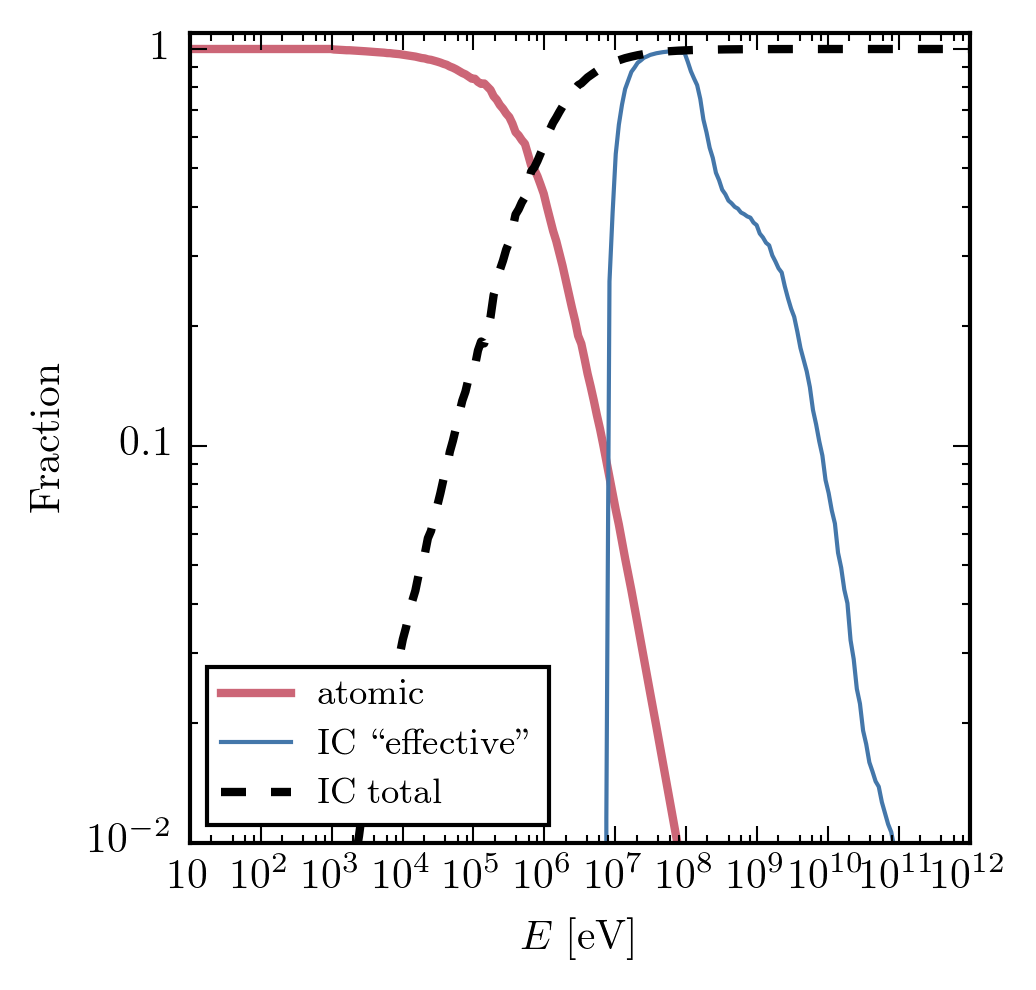

In [11]:
# Making figure, which shows the 'effective' fraction of energy.

plt.plot(E0_list, channels['atomic'], '-', 
         color=mpl.rcParams['axes.color_cycle'][0], 
         label=r"$\mathrm{atomic}$")
plt.plot(E0_list, results['IC']*(channels['IC_H'] + channels['IC_He']), '-', 
         color=mpl.rcParams['axes.color_cycle'][2],
         lw=1, 
         label=r'$\mathrm{IC\;``effective"}$')
plt.plot(E0_list, results['IC'], '--k', 
         label=r"$\mathrm{IC\;total}$")

# plt.plot(E0_list, channels['IC_soft'], '--k')
# plt.plot(E0_list, results[:, 0])
# plt.plot(E0_list, results[:, 4], '-k')

plt.xscale('log')
plt.yscale('log')
plt.ylim([0.01,1.1])
fixlogax(plt.gca(), 'x')
fixlogax(plt.gca(), 'y')
plt.xlabel(r'$E\;\mathrm{[eV]}$')
plt.ylabel(r'$\mathrm{Fraction}$')
plt.legend(loc=3)

plt.savefig('channels.pdf')

## Figure 2 (overdensities)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:26: RuntimeWarning: invalid value encountered in double_scalars
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:30: RuntimeWarning: invalid value encountered in divide
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:35: RuntimeWarning: invalid value encountered in divide
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:39: RuntimeWarning: invalid value encountered in divide


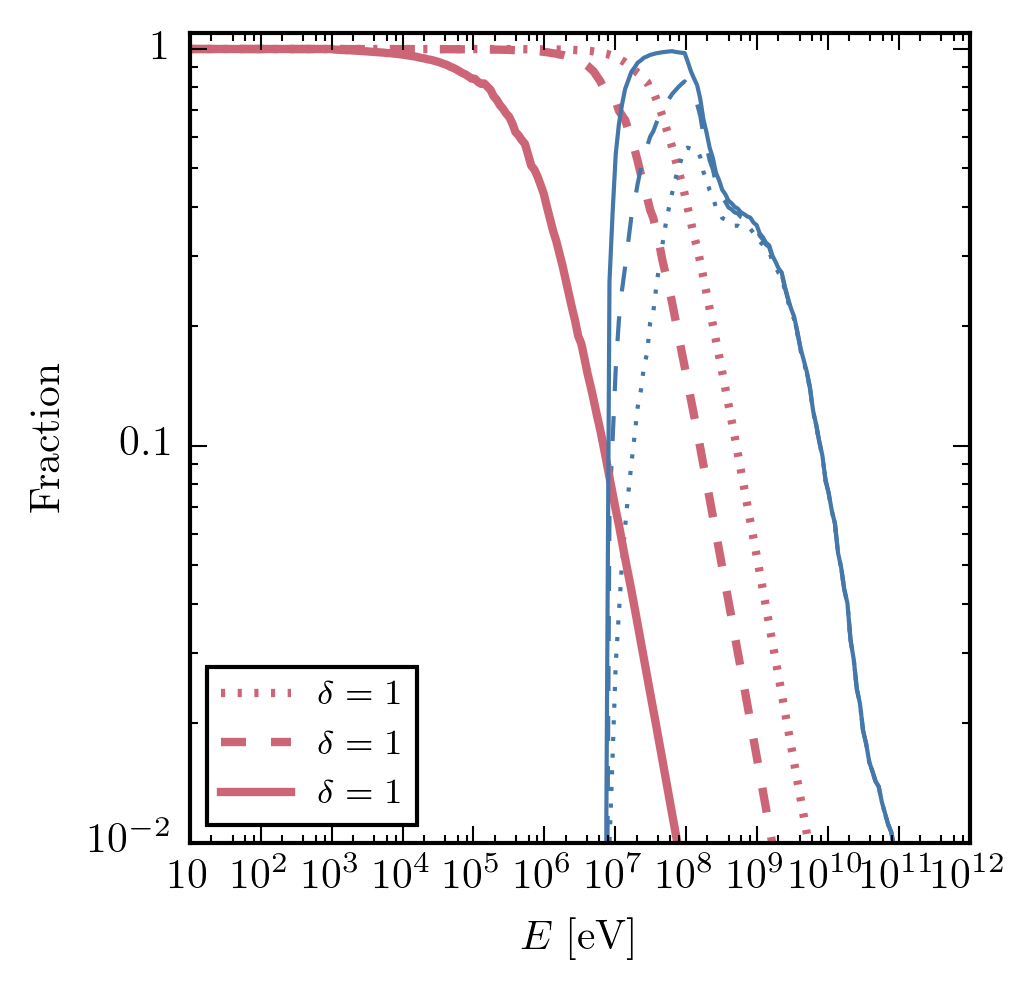

In [12]:
linestyles=[':','--','-']
q=0
for delta in [1000, 100, 0]:

    E_ph_interaction_list = np.load('E_effective.npz')['E_ph_interaction_list']
    Interaction_fraction = np.load('E_effective.npz')['Interaction_fraction']
    Interaction_fraction_H = np.load('E_effective.npz')['Interaction_fraction_H']
    Interaction_fraction_He = np.load('E_effective.npz')['Interaction_fraction_He']

    
    data = np.load('output/%05i-%01.5f-%08.1f-snap'%(z,xi,delta) + \
               '_'+cs.cs['collion']+'_'+cs.cs['collex']+ \
               '_'+cs.cs['photion'] +'.npz')


    E0_list = data['E0_list']
    Eg_list = data['Eg_list']
    EgeV_list = data['EgeV_list']
    results = data['results']
    photons_particles_all = data['photons_particles_all']


    channels = np.zeros(len(E0_list), dtype=([('IC_soft', 'f4'), ('atomic', 'f4'), ('IC_H', 'f4'), ('IC_He', 'f4'), ('IC_tot', 'f4')]))

    for i_E in range(len(E0_list)):
#         print i_E
        channels['IC_soft'][i_E] = 0
        channels['IC_soft'][i_E] = np.sum((photons_particles_all[:, i_E]*Eg_list)[EgeV_list<13.6]) / np.sum((photons_particles_all[:, i_E]*Eg_list))*results['IC'][i_E]
        channels['IC_tot'][i_E] = 0
        for i in range(len(E_ph_interaction_list)-1):
            channels['IC_tot'][i_E] += Interaction_fraction[i] * np.sum((photons_particles_all[:, i_E]*Eg_list)[(EgeV_list>=E_ph_interaction_list[i]) & (EgeV_list<E_ph_interaction_list[i+1])])
        channels['IC_tot'][i_E] /= np.sum((photons_particles_all[:, i_E]*Eg_list))

        channels['IC_H'][i_E] = 0
        for i in range(len(E_ph_interaction_list)-1):
            channels['IC_H'][i_E] += Interaction_fraction_H[i] * np.sum((photons_particles_all[:, i_E]*Eg_list)[(EgeV_list>=E_ph_interaction_list[i]) & (EgeV_list<E_ph_interaction_list[i+1])])
        channels['IC_H'][i_E] /= np.sum((photons_particles_all[:, i_E]*Eg_list))
        channels['IC_He'][i_E] = 0
        for i in range(len(E_ph_interaction_list)-1):
            channels['IC_He'][i_E] += Interaction_fraction_He[i] * np.sum((photons_particles_all[:, i_E]*Eg_list)[(EgeV_list>=E_ph_interaction_list[i]) & (EgeV_list<E_ph_interaction_list[i+1])])
        channels['IC_He'][i_E] /= np.sum((photons_particles_all[:, i_E]*Eg_list))

    channels['atomic'] = results['H_I_ion'] + results['H_I_ex'] + \
                         results['He_I_ion'] + results['He_I_ex'] + \
                         results['He_II_ion'] + results['He_II_ex'] + \
                         results['ee']
    channels['atomic'][channels['atomic']<0]=0
    plt.plot(E0_list, channels['atomic'], 
             linestyles[q], 
             color=mpl.rcParams['axes.color_cycle'][0],
             label=r"$\delta=1$")
    plt.plot(E0_list, results['IC']*(channels['IC_H'] + channels['IC_He']), 
             linestyles[q], 
             color=mpl.rcParams['axes.color_cycle'][2], 
             lw=1)
    q+=1


plt.xscale('log')
plt.yscale('log')
plt.ylim([0.01,1.1])
fixlogax(plt.gca(), 'x')
fixlogax(plt.gca(), 'y')
plt.xlabel(r'$E\;\mathrm{[eV]}$')
plt.ylabel(r'$\mathrm{Fraction}$')
plt.legend(loc=3)
plt.savefig('vary_delta.pdf')

## Figure 3 (photon propagation)
[Lower resolution than in the letter.]

In [11]:
from radiator.sims import *


cs = cross_sections(cs={'photion': 'VFKY1996', 'collion': 'RBEQ', 'collex': 'RBEQ'})

total_mocks = 100
z_start = 30.
z_end = 0.0
bins = 100

results2 = photon_absorption(cs, 1e3, z_start=z_start, bins=bins, total_mocks=total_mocks, z_end=z_end)
results4 = photon_absorption(cs, 1e4, z_start=z_start, bins=bins, total_mocks=total_mocks, z_end=z_end)
results6 = photon_absorption(cs, 1e6, z_start=z_start, bins=bins, total_mocks=total_mocks, z_end=z_end)
results8 = photon_absorption(cs, 1e8, z_start=z_start, bins=bins, total_mocks=total_mocks*10, z_end=z_end)

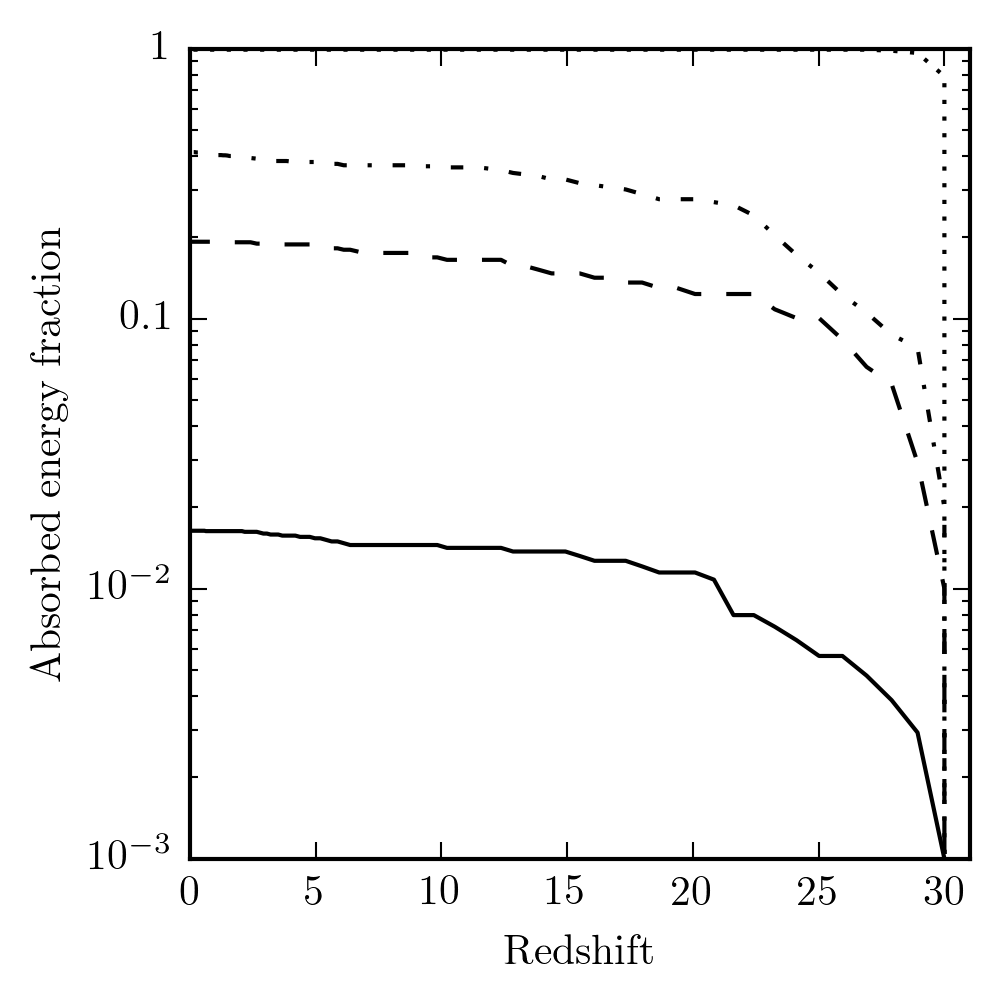

In [22]:
z_list = results2[0]

plt.plot(z_list, np.cumsum(results2[4])/total_mocks/1e3, 'k:', lw=1)
plt.plot(z_list, np.cumsum(results4[4])/total_mocks/1e4, '-.k', lw=1)
plt.plot(z_list, np.cumsum(results6[4])/total_mocks/1e6, 'k--', lw=1)
plt.plot(z_list, np.cumsum(results8[4])/total_mocks/10/1e8, 'k-', lw=1)

plt.ylabel(r'$\mathrm{Absorbed\; energy\; fraction}$')
plt.xlabel(r'$\mathrm{Redshift}$')
# plt.xscale('log')
plt.xlim([0,31])
plt.yscale('log')

# fixlogax(plt.gca(), 'x')
fixlogax(plt.gca(), 'y')

plt.savefig('photon_ans.pdf')

## Figure 4 (H/He)

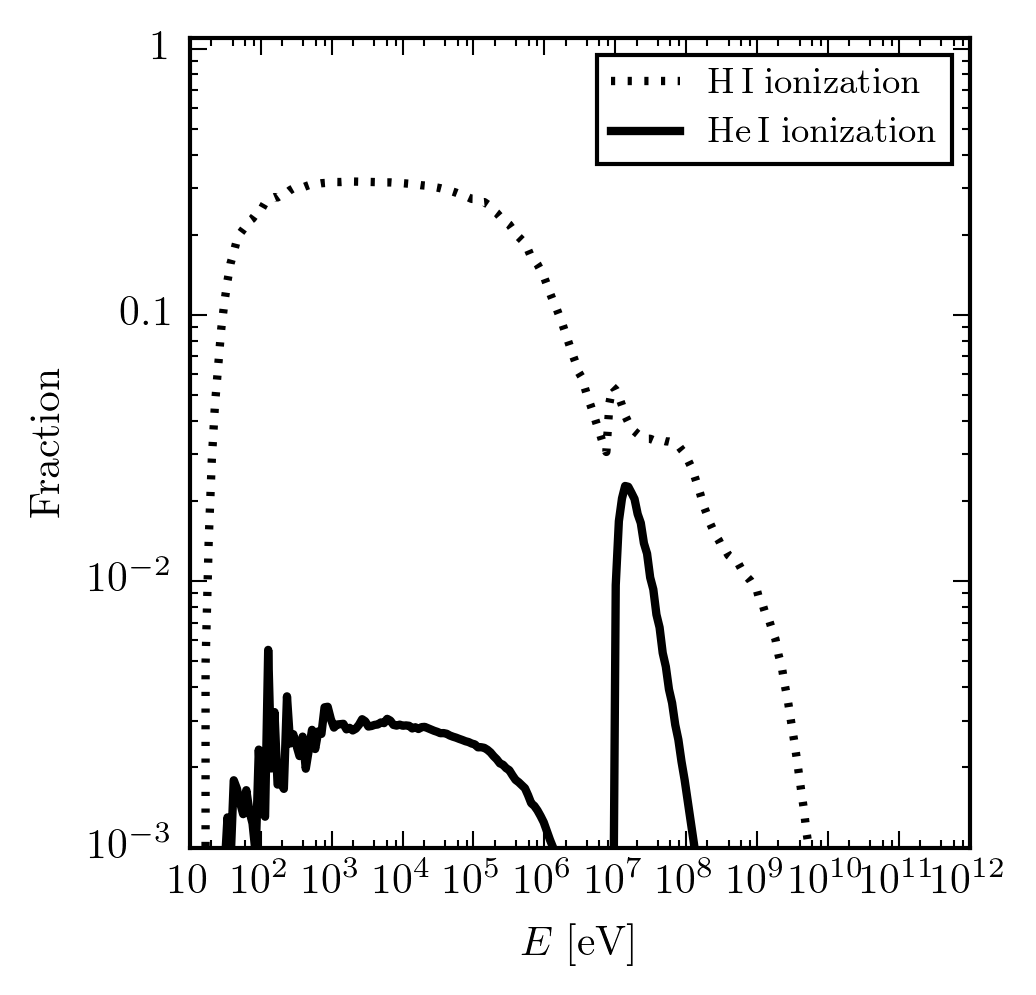

In [17]:
delta = 0.0
data = np.load('output/%05i-%01.5f-%08.1f-snap'%(z,xi,delta) + \
               '_'+cs.cs['collion']+'_'+cs.cs['collex']+ \
               '_'+cs.cs['photion'] +'.npz')

E0_list = data['E0_list']
Eg_list = data['Eg_list']
EgeV_list = data['EgeV_list']
results = data['results']
photons_particles_all = data['photons_particles_all']

channels = np.zeros(len(E0_list), dtype=([('H_ion_tot', 'f4'), ('He_ion_tot', 'f4'), ('IC_H', 'f4'), ('IC_He', 'f4'), ('IC_tot', 'f4')]))

channels['H_ion_tot'] = results['H_I_ion'] * E0_list
channels['He_ion_tot'] = (results['He_I_ion']+results['He_II_ion']) * E0_list

for i_E in range(0, len(E0_list)):
#     print i_E
    H_add = 0
    He_add = 0
    for i in range(len(EgeV_list)):
        temp_H = np.interp(EgeV_list[i], E_ph_interaction_list, Interaction_fraction_H, left=0, right=0)
        temp_He = np.interp(EgeV_list[i], E_ph_interaction_list, Interaction_fraction_He, left=0, right=0)
        # H_add += temp_H * 13.6
        # He_add += temp_He * 24.4
        # print temp_H, temp_He
        if EgeV_list[i] > 13.6:
            #
            H_add += temp_H * np.interp(EgeV_list[i]-13.6, E0_list, channels['H_ion_tot']/E0_list, left = 0, right = 0) * photons_particles_all[i, i_E] * (EgeV_list[i]-13.6)
            H_add += temp_H * photons_particles_all[i, i_E] * 13.6
            He_add += temp_H * np.interp(EgeV_list[i]-13.6, E0_list, channels['He_ion_tot']/E0_list, left = 0, right = 0)  * photons_particles_all[i, i_E] * (EgeV_list[i]-13.6)
        if EgeV_list[i] > 24.4:
            #
            H_add += temp_He * np.interp(EgeV_list[i]- 24.4, E0_list, channels['H_ion_tot']/E0_list, left = 0, right = 0) * photons_particles_all[i, i_E] * (EgeV_list[i]- 24.4)
            He_add += temp_He * photons_particles_all[i, i_E] * 24.4
            He_add += temp_He * np.interp(EgeV_list[i]- 24.4, E0_list, channels['He_ion_tot']/E0_list, left = 0, right = 0)  * photons_particles_all[i, i_E] * (EgeV_list[i]- 24.4)
        # print H_add
#     print np.sum(photons_particles_all[:, i_E] * EgeV_list[:])/E0_list[i_E], H_add/E0_list[i_E]
    channels['H_ion_tot'][i_E] += H_add
    channels['He_ion_tot'][i_E] += He_add

channels['H_ion_tot'] /= E0_list
channels['He_ion_tot'] /= E0_list

plt.plot(E0_list, channels['H_ion_tot'], ':k', label=r'$\mathrm{H\,I\;ionization}$')
plt.plot(E0_list, channels['He_ion_tot'], '-k', label=r'$\mathrm{He\,I\;ionization}$')
# plt.plot(E0_list, (channels['H_ion_tot']/nbHI/13.6) / (channels['He_ion_tot'] / nbHeI/24.4), '-k')

plt.xscale('log')
plt.yscale('log')
plt.ylim([0.001,1.1])
fixlogax(plt.gca(), 'x')
fixlogax(plt.gca(), 'y')
plt.xlabel(r'$E\;\mathrm{[eV]}$')
plt.ylabel(r'$\mathrm{Fraction}$')
plt.legend()
plt.savefig('ion_channels.pdf')

## Figure 5 (Relativism)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:28: RuntimeWarning: invalid value encountered in double_scalars
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: invalid value encountered in divide
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:36: RuntimeWarning: invalid value encountered in divide
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:40: RuntimeWarning: invalid value encountered in divide


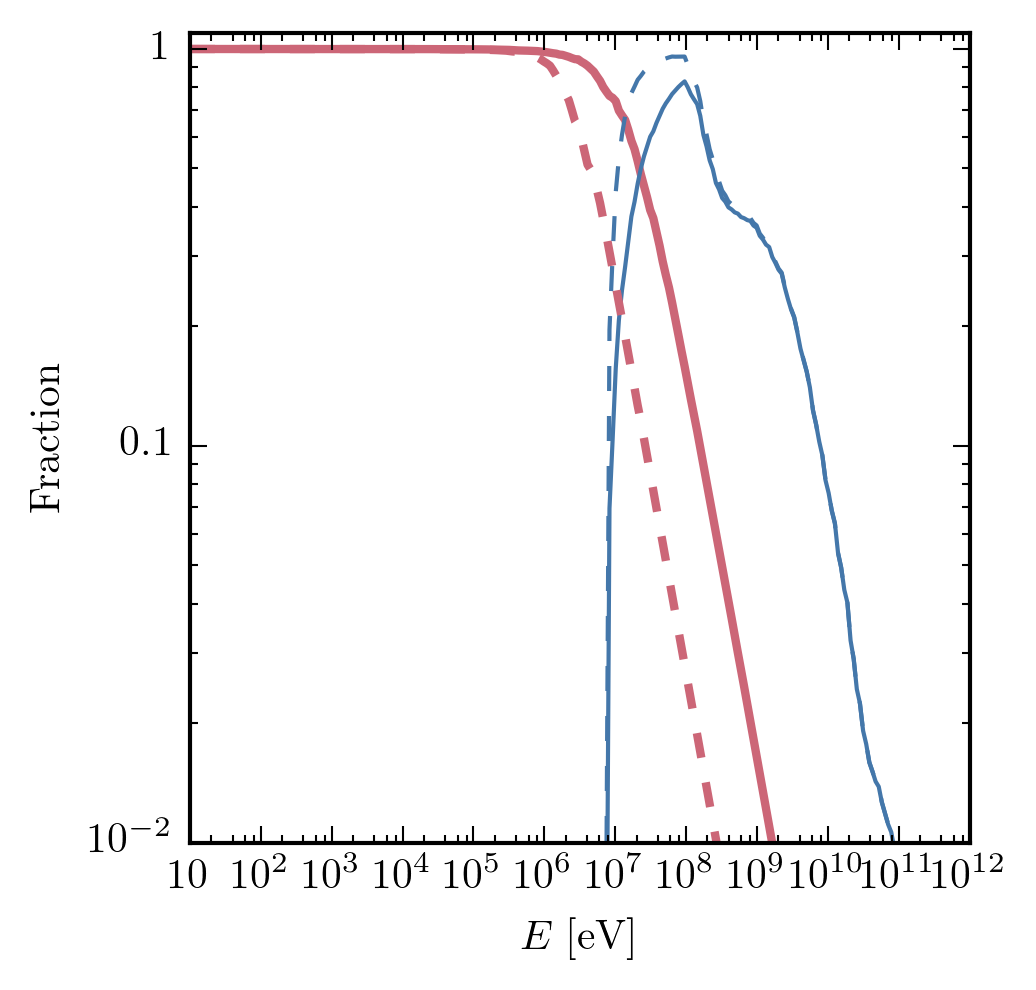

In [37]:
# system parameters
z = 30.0 # redshift
delta = 100.0 # overdensity
xi = 0.01 # ionization fraction

# setting up relativistic environment
cs = cross_sections(cs={'photion': 'VFKY1996', 'collion': 'RBEQ', 'collex': 'RBEQ'})
# non-relativistic case for comaprision
cs2 = cross_sections(cs={'photion': 'VFKY1996', 'collion': 'AR', 'collex': 'SKD'})

data = np.load('output/%05i-%01.5f-%08.1f-snap'%(z,xi,delta) + \
               '_'+cs.cs['collion']+'_'+cs.cs['collex']+ \
               '_'+cs.cs['photion'] +'.npz')


E0_list = data['E0_list']
Eg_list = data['Eg_list']
EgeV_list = data['EgeV_list']
results = data['results']
photons_particles_all = data['photons_particles_all']
res, chan = calculate_channels_fractions(data)

   
data = np.load('output/%05i-%01.5f-%08.1f-snap'%(z,xi,delta) + \
               '_'+cs2.cs['collion']+'_'+cs2.cs['collex']+ \
               '_'+cs2.cs['photion'] +'.npz')


E0_list = data['E0_list']
Eg_list = data['Eg_list']
EgeV_list = data['EgeV_list']
results = data['results']
photons_particles_all = data['photons_particles_all']
res2, chan2 = calculate_channels_fractions(data)

plt.plot(E0_list, chan['atomic'], '-k', 
         color=mpl.rcParams['axes.color_cycle'][0])
plt.plot(E0_list, res['IC']*(chan['IC_H'] + chan['IC_He']), '-k', 
         color=mpl.rcParams['axes.color_cycle'][2],lw=1)
plt.plot(E0_list, chan2['atomic'], '--k', 
         color=mpl.rcParams['axes.color_cycle'][0])
plt.plot(E0_list, res2['IC']*(chan2['IC_H'] + chan2['IC_He']), '--k', 
         color=mpl.rcParams['axes.color_cycle'][2],lw=1)
# plt.plot(E0_list, results['IC'], '--k')

plt.xscale('log')
plt.yscale('log')
plt.ylim([0.01,1.1])
fixlogax(plt.gca(), 'x')
fixlogax(plt.gca(), 'y')
plt.xlabel(r'$E\;\mathrm{[eV]}$')
plt.ylabel(r'$\mathrm{Fraction}$')

plt.savefig('relativism.pdf')